## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [0]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________




In [0]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.2724 - acc: 0.9016 - val_loss: 3.0651 - val_acc: 0.5024
Epoch 2/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.2621 - acc: 0.9050 - val_loss: 3.1616 - val_acc: 0.5022
Epoch 3/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.2820 - acc: 0.8989 - val_loss: 3.1934 - val_acc: 0.4959
Epoch 4/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.2875 - acc: 0.8966 - val_loss: 3.1667 - val_acc: 0.4953
Epoch 5/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.2965 - acc: 0.8917 - val_loss: 3.2305 - val_acc: 0.4967
Epoch 6/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.2620 - acc: 0.9068 - val_loss: 3.2048 - val_acc: 0.4980
Epoch 7/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.2762 - acc: 0.9005 - val_loss: 3.2586 - 

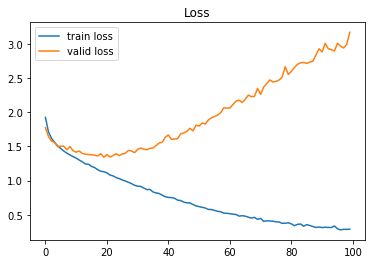

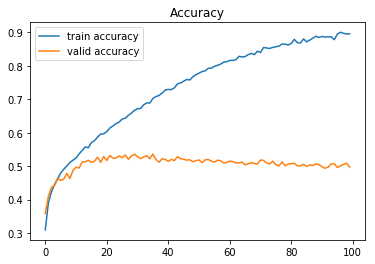

In [0]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [0]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='SGD')


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 3.1324 - val_acc: 0.5422
Epoch 2/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 3.1396 - val_acc: 0.5416
Epoch 3/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 3.1372 - val_acc: 0.5425
Epoch 4/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 3.1433 - val_acc: 0.5436
Epoch 5/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 3.1424 - val_acc: 0.5428
Epoch 6/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 3.1454 - val_acc: 0.5425
Epoch 7/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 3.1449 - 

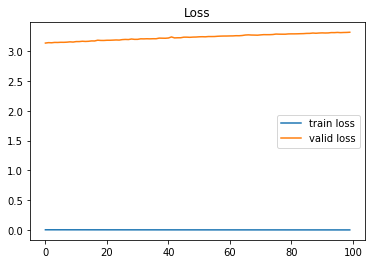

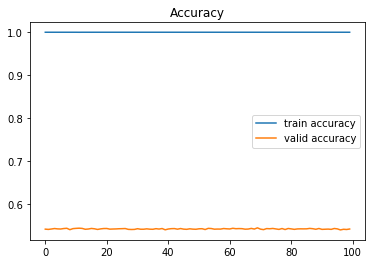

In [0]:
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()